# Setup do Projeto

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
import statsmodels.formula.api as smapi

### Importando os Datasets

# Previsão do INPC pelo IPCA

A ideia é criar um modelo para prever o INPC utilizando o IPCA

In [2]:
df = pd.read_csv("datasets/inflacao.csv")

In [3]:
df.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,7.31,7.31,4.48,4.48,4.70,4.70,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,3.69,11.00,3.35,7.83,9.53,14.23,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,6.32,17.32,4.34,12.17,12.80,27.03,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,6.69,24.01,3.93,16.10,3.13,30.16,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,...,7.32,31.33,6.52,22.62,4.86,35.02,0.0,0.0,4149.6,False


In [4]:
df.tail()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo,consolidado_ano
512,2022-09,2022,9,202209,-0.29,4.09,7.17,-0.37,4.63,7.96,...,-1.68,5.86,0.12,5.64,0.09,8.36,0.10,8.61,1212.0,False
513,2022-10,2022,10,202210,0.59,4.70,6.47,0.16,4.80,6.85,...,-1.04,4.82,0.45,6.09,0.12,8.48,0.04,8.65,1212.0,False
514,2022-11,2022,11,202211,0.41,5.13,5.90,0.53,5.35,6.17,...,-0.43,4.39,0.47,6.56,0.36,8.84,0.14,8.79,1212.0,False
515,2022-12,2022,12,202212,0.62,5.79,5.79,0.52,5.90,5.90,...,0.32,4.71,0.54,7.10,0.09,8.93,0.27,9.06,1212.0,True
516,2023-01,2023,1,202301,0.53,0.53,5.77,0.55,0.55,5.87,...,-0.19,-0.19,0.63,0.63,0.46,0.46,0.32,0.32,1302.0,False


In [5]:
df.describe()

,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,...,inpc_acumulado_doze_meses,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,2001.042553,6.489362,200110.744681,5.927427,96.134642,308.911799,0.270793,1.860406,3.390561,5.916286,...,307.951025,6.149207,41.240716,5.767118,38.692882,6.084565,41.784449,3.822050,25.644081,5.521781e+04
std,12.447336,3.460517,1244.719594,10.846192,265.522677,863.248689,0.392252,2.415721,3.811247,10.852317,...,849.346137,11.031997,73.665738,10.762521,72.642596,11.203784,73.694792,10.259201,67.494854,3.250240e+05
min,1980.000000,1.000000,198001.000000,-0.680000,-0.160000,0.000000,-0.730000,0.000000,0.000000,-0.600000,...,0.000000,-2.420000,-5.820000,-1.000000,-1.790000,-0.500000,0.310000,0.000000,0.000000,5.437000e+01
25%,1990.000000,3.000000,199010.000000,0.380000,2.480000,5.260000,0.000000,0.000000,0.000000,0.390000,...,5.420000,0.260000,2.210000,0.300000,1.990000,0.360000,2.900000,0.120000,0.400000,2.400000e+02
50%,2001.000000,6.000000,200107.000000,0.780000,5.230000,7.770000,0.060000,0.650000,2.800000,0.810000,...,8.900000,1.350000,7.540000,0.740000,4.910000,0.880000,6.560000,0.400000,3.350000,7.240000e+02
75%,2012.000000,9.000000,201204.000000,6.840000,48.390000,156.780000,0.490000,3.270000,6.200000,6.710000,...,156.800000,7.310000,42.980000,6.710000,39.390000,5.940000,45.910000,0.950000,7.270000,3.674060e+03
max,2023.000000,12.000000,202301.000000,82.390000,2477.150000,6821.310000,3.050000,11.990000,17.240000,82.180000,...,6554.520000,82.040000,381.830000,79.110000,374.660000,78.410000,388.770000,72.480000,376.500000,4.639800e+06


#### Definindo as varáveis de análise

In [6]:
inpc_variacao = df.inpc_variacao
inpc_variacao.describe()

count    517.000000
mean       5.916286
std       10.852317
min       -0.600000
25%        0.390000
50%        0.810000
75%        6.710000
max       82.180000
Name: inpc_variacao, dtype: float64

In [7]:
ipca_variacao = df.ipca_variacao
ipca_variacao.describe()

count    517.000000
mean       5.927427
std       10.846192
min       -0.680000
25%        0.380000
50%        0.780000
75%        6.840000
max       82.390000
Name: ipca_variacao, dtype: float64

In [8]:
ipa_variacao = df.ipa_variacao
ipa_variacao.describe()

count    517.000000
mean       6.149207
std       11.031997
min       -2.420000
25%        0.260000
50%        1.350000
75%        7.310000
max       82.040000
Name: ipa_variacao, dtype: float64

# Regressão Linear Simples

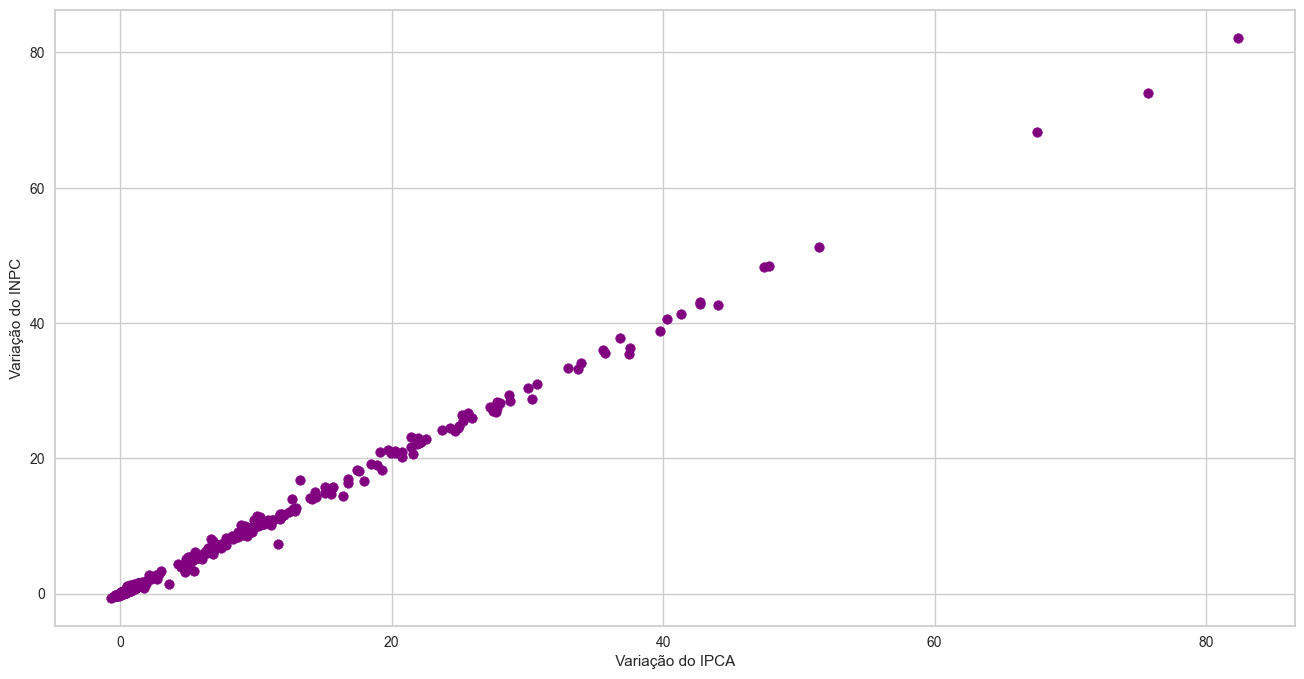

In [9]:
plt.figure(figsize = (16,8))
plt.scatter(
    ipca_variacao, 
    inpc_variacao, 
    c='purple')
plt.xlabel(" Variação do IPCA ")
plt.ylabel(" Variação do INPC ")
plt.show()


#### Criando um modelo simples

In [10]:
X = df['ipca_variacao'].values.reshape(-1,1)
y = df['inpc_variacao'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é: Inflação = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


O modelo é: Inflação = -0.0085127 + 0.99956X


In [11]:
df['ipca_variacao'].corr(df['inpc_variacao'])

0.9989923904182655

* A correlacão 0.99 é extremamente alta

In [12]:
correlacao = np.corrcoef(df['ipca_variacao'], df['inpc_variacao'])
correlacao

array([[1.        , 0.99899239],
       [0.99899239, 1.        ]])

* A correlação 0.99 é considerada forte

#### Verificando a precisão do modelo

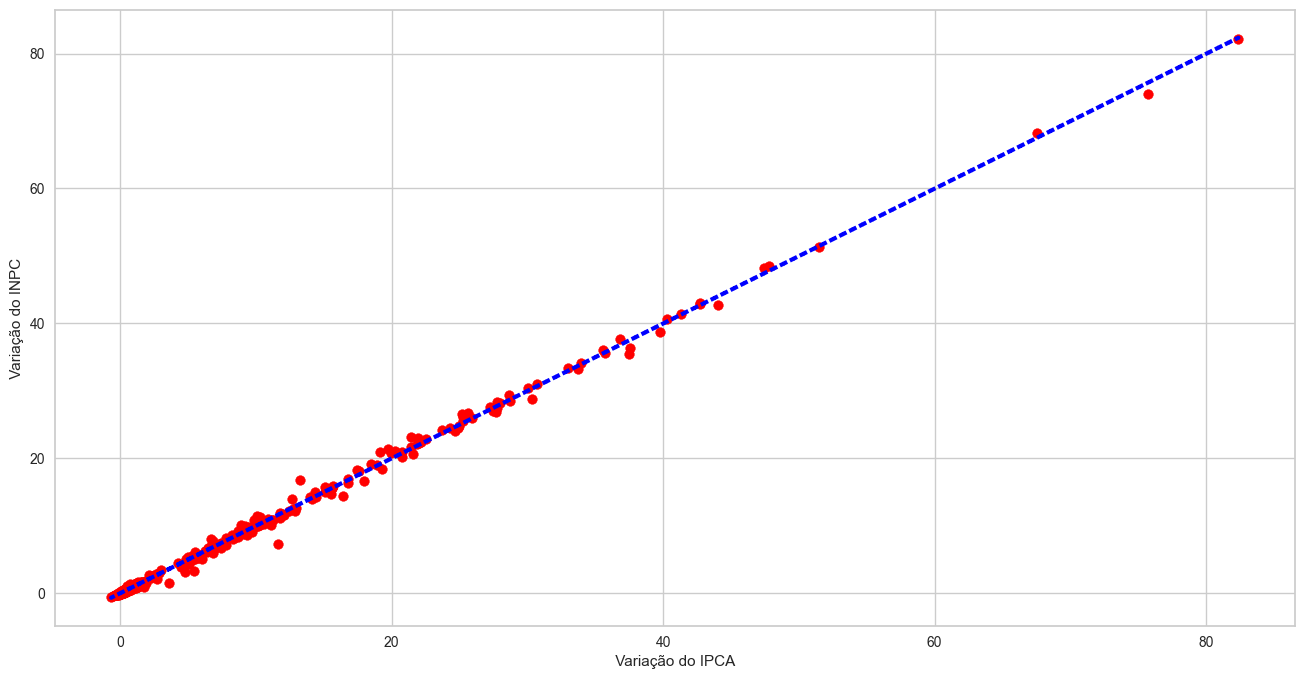

In [13]:
f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(
    df['ipca_variacao'], 
    df['inpc_variacao'], 
    c='red')


plt.plot(
    df['ipca_variacao'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" Variação do IPCA ")
plt.ylabel(" Variação do INPC ")
plt.show()

#### Sumario do Modelo - Avaliar Precisão 

In [14]:
X = df['ipca_variacao']
y = df['inpc_variacao']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          inpc_variacao   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.552e+05
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:04:22   Log-Likelihood:                -361.17
No. Observations:                 517   AIC:                             726.3
Df Residuals:                     515   BIC:                             734.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0085      0.024     -0.348

#### Resultado do Modelo

* O R2 é de 0.99. 
* Isso significa que 99% do comportamento da variável `ipca_variacao`é explicado pela variável `inpc_variacao`. 
* Nosso `p-valor` é de 0.728. Isso significa que podemos aceitar a hipótese nula. Se o mesmo estivesse baixo, rejeitariamos a hipótese nula e chegariamos a conclusão de que os dados não são bons o suficiente para gerar um modelo bom.  

#### Qual será a o INPC do mês quando a variação do IPCA for de 0.13?

In [15]:
reg.predict([[0.13]])

array([[0.12142962]])

#### Qual será o INPC do mês quando a variação do IPCA for de 1.99%?

In [16]:
reg.predict([[1.99]])

array([[1.98060482]])

#### Qual será o INPC do mês quando a variação do IPCA for de -63%?

In [17]:
reg.predict([[-0.63]])

array([[-0.63823337]])

#### Qual será o INPC do mês quando a variação do IPCA for de 0.59%?

In [18]:
reg.predict([[0.59]])

array([[0.58122563]])

# Previsão do IPCA pelo IPCA15

O objetivo é prever o IPCA a partir do IPCA15

## Tratamento dos dados

#### Excluindo os anos que o IPCA15 não foi calculado. 

O calculo do `IPCA15` começou a ser efetuado no ano de 2000, enquanto sua série principal, o `IPCA` é observado historicamente e disponibilizado desde 1980. Então vamos deixar somente as observações do dataset nos quais o IPCA15 tem registros de variação. 

O `IPCA15` sai 15 dias antes do `IPCA` padrão. Então o mesmo sai como uma prévia do IPCA funcional. 

In [19]:
df_ipca_analise = df[df.ipca15_variacao != 0]

In [20]:
df_ipca_analise.describe()

,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,...,inpc_acumulado_doze_meses,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2011.205128,6.538462,201127.051282,0.513626,3.442784,6.418791,0.512821,3.523187,6.420952,0.528425,...,6.599048,0.759194,4.717216,0.476447,3.034835,0.636374,4.498571,0.635348,4.381868,611.805861
std,6.584438,3.456583,658.316556,0.405529,2.262610,2.806327,0.409038,2.278345,2.833088,0.455179,...,3.350691,1.266827,5.766133,0.421468,2.161013,0.558332,3.122502,0.547320,3.156202,326.672240
min,2000.000000,1.000000,200005.000000,-0.680000,-0.160000,1.880000,-0.730000,0.300000,1.920000,-0.600000,...,1.560000,-1.960000,-5.820000,-0.420000,-0.040000,-0.250000,0.310000,0.000000,0.000000,151.000000
25%,2006.000000,4.000000,200601.000000,0.280000,1.640000,4.560000,0.250000,1.700000,4.440000,0.240000,...,4.680000,0.010000,0.690000,0.190000,1.210000,0.270000,1.700000,0.270000,1.470000,300.000000
50%,2011.000000,7.000000,201109.000000,0.470000,3.130000,6.060000,0.470000,3.140000,6.130000,0.480000,...,5.950000,0.550000,3.380000,0.390000,2.720000,0.460000,4.330000,0.440000,4.000000,545.000000
75%,2017.000000,10.000000,201705.000000,0.700000,4.850000,7.510000,0.690000,5.030000,7.470000,0.730000,...,7.590000,1.350000,7.510000,0.670000,4.450000,0.860000,6.420000,0.820000,6.370000,937.000000
max,2023.000000,12.000000,202301.000000,3.020000,12.530000,17.240000,3.050000,11.990000,17.240000,3.390000,...,20.440000,7.450000,31.010000,2.650000,10.560000,2.940000,13.570000,2.980000,13.870000,1302.000000


In [21]:
df_ipca_analise.tail()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo,consolidado_ano
512,2022-09,2022,9,202209,-0.29,4.09,7.17,-0.37,4.63,7.96,...,-1.68,5.86,0.12,5.64,0.09,8.36,0.10,8.61,1212.0,False
513,2022-10,2022,10,202210,0.59,4.70,6.47,0.16,4.80,6.85,...,-1.04,4.82,0.45,6.09,0.12,8.48,0.04,8.65,1212.0,False
514,2022-11,2022,11,202211,0.41,5.13,5.90,0.53,5.35,6.17,...,-0.43,4.39,0.47,6.56,0.36,8.84,0.14,8.79,1212.0,False
515,2022-12,2022,12,202212,0.62,5.79,5.79,0.52,5.90,5.90,...,0.32,4.71,0.54,7.10,0.09,8.93,0.27,9.06,1212.0,True
516,2023-01,2023,1,202301,0.53,0.53,5.77,0.55,0.55,5.87,...,-0.19,-0.19,0.63,0.63,0.46,0.46,0.32,0.32,1302.0,False


In [22]:
ipca_variacao = df_ipca_analise.ipca_variacao
ipca_variacao.describe()

count    273.000000
mean       0.513626
std        0.405529
min       -0.680000
25%        0.280000
50%        0.470000
75%        0.700000
max        3.020000
Name: ipca_variacao, dtype: float64

In [23]:
ipca15_variacao = df_ipca_analise.ipca15_variacao
ipca15_variacao.describe()

count    273.000000
mean       0.512821
std        0.409038
min       -0.730000
25%        0.250000
50%        0.470000
75%        0.690000
max        3.050000
Name: ipca15_variacao, dtype: float64

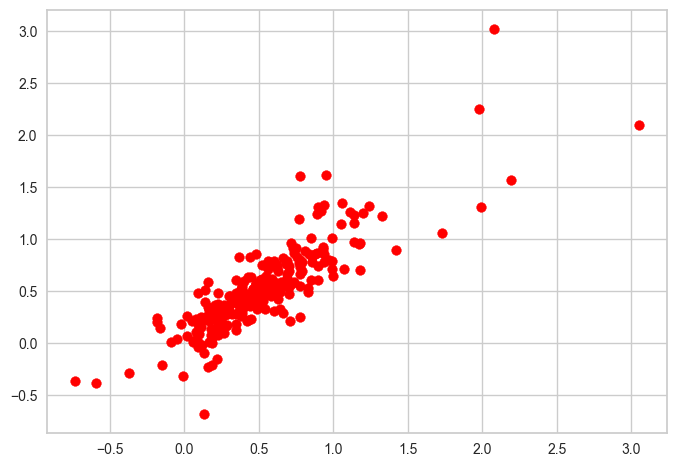

In [24]:
plt.scatter(ipca15_variacao, ipca_variacao, c='red')
plt.show()

#### Encontrando a melhor reta para regressão

In [25]:
reg = LinearRegression()

#### Transformando os Series do Pandas em Arrays para fazer o fit dos dados. 

In [26]:
reg.fit(
    ipca15_variacao.values.reshape(-1, 1), 
    ipca_variacao.values.reshape(-1, 1)
)

LinearRegression()

In [27]:
reg.coef_

array([[0.84810408]])

#### Melhor possibilidade de onde a reta vai cortar o eixo. 

In [28]:
reg.intercept_

array([0.0787012])

#### Testando o coeficiente de interceptação para traçar o gráfico linearmente

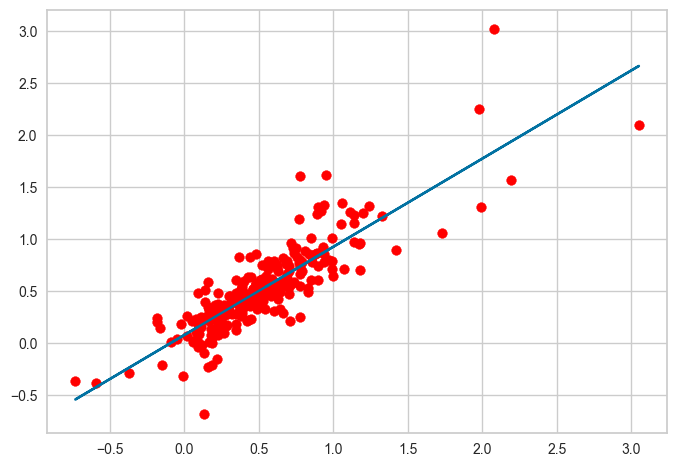

In [29]:
plt.scatter(ipca15_variacao, ipca_variacao, c="red")
x = np.array(ipca15_variacao)
y = reg.intercept_ + x * reg.coef_
plt.plot(x, y[0], "b")
plt.show()

In [30]:
ipca_variacao.corr(ipca15_variacao)

0.8554422130520664

* Correlação 0.85 é extremamente alta

In [31]:
X = ipca_variacao
y = ipca15_variacao
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        ipca15_variacao   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     739.4
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           2.05e-79
Time:                        14:04:22   Log-Likelihood:                 36.806
No. Observations:                 273   AIC:                            -69.61
Df Residuals:                     271   BIC:                            -62.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0696      0.021      3.356

#### Resultado do Modelo
O R2 é de 0.732.
Isso significa que 73% do comportamento da variável `ipca_variacao` é explicado pela variável `ipca15_variacao`.
Nosso p-valor é de 0.001. Isso significa que `não`podemos aceitar a hipótese nula. Se o mesmo estivesse alto, aceitariamos a hipótese nula e chegariamos a conclusão de que os dados  são bons o suficiente para gerar um modelo bom.

Gerada a melhor reta de regressão, podemos começar a fazer as perguntas para o modelo. 

#### Qual será a o IPCA do mês quando o IPCA15 for de 0.6?

In [32]:
reg.predict([[0.6]])

array([[0.58756365]])

#### Qual será o IPCA do mês quando o IPCA15 for de 1.99%?

In [33]:
reg.predict([[1.99]])

array([[1.76642832]])

#### Qual será o IPCA do mês quando o IPCA15 for de 0.53%?

In [34]:
reg.predict([[0.53]])

array([[0.52819637]])

## Visualizar os residuais

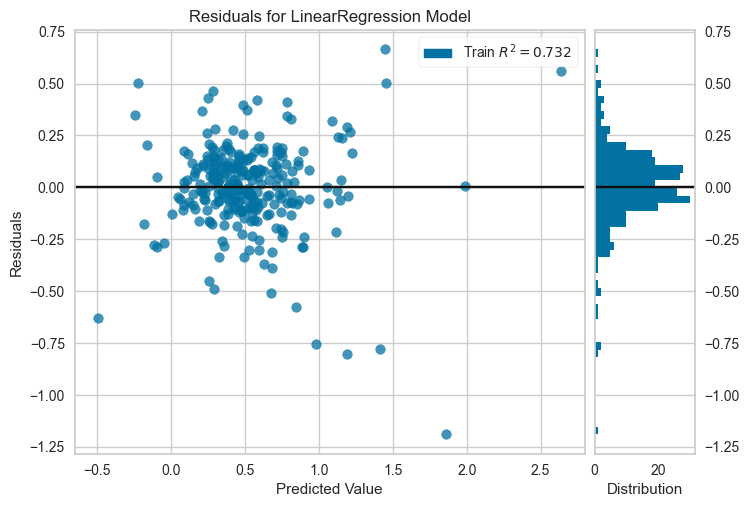

In [35]:
visualizador = ResidualsPlot(reg)
visualizador.fit(ipca_variacao.values.reshape(-1, 1), ipca15_variacao.values.reshape(-1, 1))
visualizador.poof();

# Treinando e ajustando o modelo de regressão

In [36]:
df = pd.read_csv("datasets/inflacao.csv")

In [37]:
df.head()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,7.31,7.31,4.48,4.48,4.70,4.70,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,3.69,11.00,3.35,7.83,9.53,14.23,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,6.32,17.32,4.34,12.17,12.80,27.03,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,6.69,24.01,3.93,16.10,3.13,30.16,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,...,7.32,31.33,6.52,22.62,4.86,35.02,0.0,0.0,4149.6,False


In [74]:
df.tail()

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipa_variacao,ipa_acumulado_ano,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,salario_minimo,consolidado_ano
512,2022-09,2022,9,202209,-0.29,4.09,7.17,-0.37,4.63,7.96,...,-1.68,5.86,0.12,5.64,0.09,8.36,0.10,8.61,1212.0,False
513,2022-10,2022,10,202210,0.59,4.70,6.47,0.16,4.80,6.85,...,-1.04,4.82,0.45,6.09,0.12,8.48,0.04,8.65,1212.0,False
514,2022-11,2022,11,202211,0.41,5.13,5.90,0.53,5.35,6.17,...,-0.43,4.39,0.47,6.56,0.36,8.84,0.14,8.79,1212.0,False
515,2022-12,2022,12,202212,0.62,5.79,5.79,0.52,5.90,5.90,...,0.32,4.71,0.54,7.10,0.09,8.93,0.27,9.06,1212.0,True
516,2023-01,2023,1,202301,0.53,0.53,5.77,0.55,0.55,5.87,...,-0.19,-0.19,0.63,0.63,0.46,0.46,0.32,0.32,1302.0,False


In [38]:
cols = ['ipca_variacao', 'ipca15_variacao']
df_corr = df[cols]

In [39]:
df_corr.shape

(517, 2)

In [40]:
df_corr.head(5)

,ipca_variacao,ipca15_variacao
0,6.62,0.0
1,4.62,0.0
2,6.04,0.0
3,5.29,0.0
4,5.70,0.0


In [41]:
stats.pearsonr(df_corr['ipca_variacao'], df_corr['ipca15_variacao'])

PearsonRResult(statistic=-0.32767181753181174, pvalue=2.0975681392103156e-14)

* 32% de correlação entre ipca e ipca15
* Necessário ajustes para melhorar a performance do modelo

## Ignorando os zeros do dataframe

In [42]:
#df_corr[cols] = df_corr[cols].mask(df_corr[cols].eq(0).all(axis=1))

In [43]:
df_corr.loc[df_corr['ipca15_variacao'] == 0, 'ipca15_variacao'] = np.nan

/var/folders/ht/zw2nx83j6w387qgthkq66lg80000gn/T/ipykernel_14375/2510903734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr.loc[df_corr['ipca15_variacao'] == 0, 'ipca15_variacao'] = np.nan


In [44]:
df_corr.shape

(517, 2)

In [45]:
df_corr.head(5)

,ipca_variacao,ipca15_variacao
0,6.62,NaN
1,4.62,NaN
2,6.04,NaN
3,5.29,NaN
4,5.70,NaN


In [46]:
df_corr = df_corr.dropna()

In [47]:
df_corr.shape

(273, 2)

In [48]:
df_corr.head(5)

,ipca_variacao,ipca15_variacao
244,0.01,0.09
245,0.23,0.08
246,1.61,0.78
247,1.31,1.99
248,0.23,0.45


#### Teste da Correlação de Pearson a partir dos dados filtrados

In [49]:
stats.pearsonr(df_corr['ipca_variacao'], df_corr['ipca15_variacao'])

PearsonRResult(statistic=0.8554422130520657, pvalue=2.0536769849515574e-79)

* Conseguimos melhorar a estatística de correlação `Pearson` de `32%` para `85%` ignorando os dados sem valor utilizável

## Criando dataset de treino x teste

In [76]:
X = df_corr['ipca15_variacao'].values.reshape(-1, 1)

In [77]:
y = df_corr['ipca_variacao'].values.reshape(-1, 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
X_train.shape

(218, 1)

In [80]:
X_test.shape

(55, 1)

## Treinando o modelo de regressão

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
regressor.intercept_

array([0.07271394])

In [82]:
regressor.coef_

array([[0.8684672]])

## Teste do Modelo

In [59]:
y_pred = regressor.predict(X_test)

In [60]:
df_preds = pd.DataFrame({'Valor Real': y_test.squeeze(), 'Predicted': y_pred.squeeze()})

In [61]:
df_preds.head(20)

,Valor Real,Predicted
0,0.33,0.628533
1,0.73,0.750118
2,0.43,0.367993
3,0.15,0.272461
4,1.32,1.149613
5,0.57,0.489578
6,0.30,0.281146
7,0.48,0.150876
8,0.86,0.802226
9,0.18,0.298515


### Avaliação do Modelo

##### MAE - Mean Absolute Error 
Erro Absoluto Médio (MAE): Subtraímos os valores previstos dos valores reais, obtendo os erros, somamos os valores absolutos desses erros e obtemos sua média. Essa métrica dá uma noção do erro geral para cada previsão do modelo, quanto menor (mais próximo de 0) melhor.

##### MSE - Mean Squared Error
Erro Quadrático Médio (MSE) É semelhante à métrica MAE, mas eleva ao quadrado os valores absolutos dos erros. Além disso, como no MAE, quanto menor ou mais próximo de 0, melhor. O valor MSE é elevado ao quadrado para tornar os erros ainda maiores. Uma coisa a ter bastante atenção é que costuma ser uma métrica difícil de interpretar devido ao tamanho de seus valores e ao fato de não estarem na mesma escala dos dados.

##### RMSE - Root Mean Squared Error
Raiz quadrada do erro-médio (RMSE) : Tenta resolver o problema de interpretação levantado com o MSE obtendo a raiz quadrada de seu valor final, de modo a escalá-lo de volta para as mesmas unidades dos dados. É mais fácil de interpretar e bom quando precisamos exibir ou mostrar o valor real dos dados com o erro. Ele mostra o quanto os dados podem variar, portanto, se tivermos um RMSE de 4,35, nosso modelo pode cometer um erro porque adicionou 4,35 ao valor real ou precisou de 4,35 para chegar ao valor real. Quanto mais próximo de 0, melhor também.


In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [63]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.13
Mean squared error: 0.03
Root mean squared error: 0.17


### Perguntando ao Modelo

> Quanto será o IPCA do mês onde o IPCA15 for de 0.32%?

In [64]:
regressor.predict([[0.32]])

array([[0.35062344]])

# Regressão Linear Multipla

In [65]:
modelo = LinearRegression()

In [66]:
X = df.ipca_variacao.values.reshape(-1,1)
Y = df.ipa_variacao.values.reshape(-1,1)

In [67]:
modelo.fit(X, Y)

LinearRegression()

In [68]:
modelo.score(X, Y)

0.9692649761347334

In [69]:
modelo_ajustado = smapi.ols(formula = "ipca_variacao ~ ipa_variacao + incc_variacao + inpc_variacao", data = df)

In [70]:
modelo_treinado = modelo_ajustado.fit()

In [71]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ipca_variacao   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.767e+04
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:04:22   Log-Likelihood:                -352.05
No. Observations:                 517   AIC:                             712.1
Df Residuals:                     513   BIC:                             729.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0183      0.024      0.755      0.451      -0.029       0.066
ipa_variacao     -0.0162      0.011     -1.414      0.158      -0.039       0.006
incc_variacao     0.0293      0.007      4.107      0.000       0.015       0.043
inpc_variacao     0.9855      0.013     75.822      0.000       0.960       1.011
==============================================================================
Omnibus:                      220.930   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11168.715
Skew:                           1.065   Prob(JB):                         0.00
Kurtosis:                      25.670   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Nosso R2 é de 0.998. Isso significa 99% da variável do IPCA sendo explicada pelo IPCA-15

In [72]:
novo = np.array([0.4, 0.36, 0.5])
# novo = novo.reshape(1, -1)?
novo.shape

(3,)

In [73]:
#modelo_treinado.predict(novo)

## Adicionando mais variaveis para a regressão multipla